<div class="alert alert-block alert-info">
<H2> Notebook Instructions </H2><BR>
1. Press <mark>Shift</mark> + <mark>Enter</mark> to run the cells.<BR>
2. All the Jupyter notebook and data files can be downloaded from the LMS. Please prefix your query with <mark>Support</mark> if you are facing issues in locating the files. If you are watching offline, then reach out to your support manager at <mark>support@quantinsti.com.</mark><BR>
3. If you are new to Jupyter notebook, then read <a href= "https://blog.quantinsti.com/jupyter-notebook-tutorial-installation-components-magic-commands/">this guide</a>.
</div>

In [1]:
import warnings
warnings.simplefilter('ignore')

# Define period of backtesting
from datetime import date
start_date = date(2017, 1, 1)
end_date = date(2020, 3, 5)

# Define instrument list
instrument_list = [
    'BANKBARODA.NS',
    'BANKINDIA.NS',
    'CANBK.NS',
    'IDBI.NS',
    'INDIANB.NS',
    'PNB.NS',
    'SBIN.NS',
    'UNIONBANK.NS',
    'PNBHOUSING.NS',
    'LICHSGFIN.NS'
]

In [2]:
# Import the libraries and modules required in the strategy
from data import get_stock_data
from alpha import ma_crossover
import pandas as pd
from performance_analytics import compute_ret

short_lookback = 2
long_lookback = 7

portfolio = pd.DataFrame()

for instrument_name in instrument_list:
    try:
        # Fetch data
        data = get_stock_data(instrument_name, start_date, end_date)
        data = ma_crossover(data, short_lookback, long_lookback)
        #print(instrument_name, data.iloc[-1])

        # Alphas
        data = data.dropna()
        data['signal'] = data['ma_signal']

        # Calculate the returns
        data = compute_ret(data)
        portfolio['ret_'+instrument_name] = data.strategy_ret
    except Exception as e:
        print(e, instrument_name)

portfolio.iloc[-5:, :5]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ret_BANKBARODA.NS,ret_BANKINDIA.NS,ret_CANBK.NS,ret_IDBI.NS,ret_INDIANB.NS
Date,,,,,
2020-02-27,0.023691,0.028120,0.027204,0.008969,0.031990
2020-02-28,0.025543,0.076854,0.076181,0.076923,0.021150
2020-03-02,0.067497,0.019589,0.038622,0.026144,0.041864
2020-03-03,-0.024596,0.013986,-0.026059,0.011745,0.015504
2020-03-04,-0.005487,0.023303,0.020106,0.030560,-0.017180


In [3]:
portfolio['strategy_ret'] = portfolio.mean(axis=1)
portfolio.strategy_ret.head()

Date
2017-01-11         NaN
2017-01-12   -0.002822
2017-01-13   -0.000405
2017-01-16    0.011235
2017-01-17   -0.002194
Name: strategy_ret, dtype: float64

## Performance Analysis

Start date,2017-01-11
End date,2020-03-04
Total months,36
,Backtest
Annual return,31.7%
Cumulative returns,133.2%
Annual volatility,27.9%
Sharpe ratio,1.13
Calmar ratio,1.82
Stability,0.91
Max drawdown,-17.5%


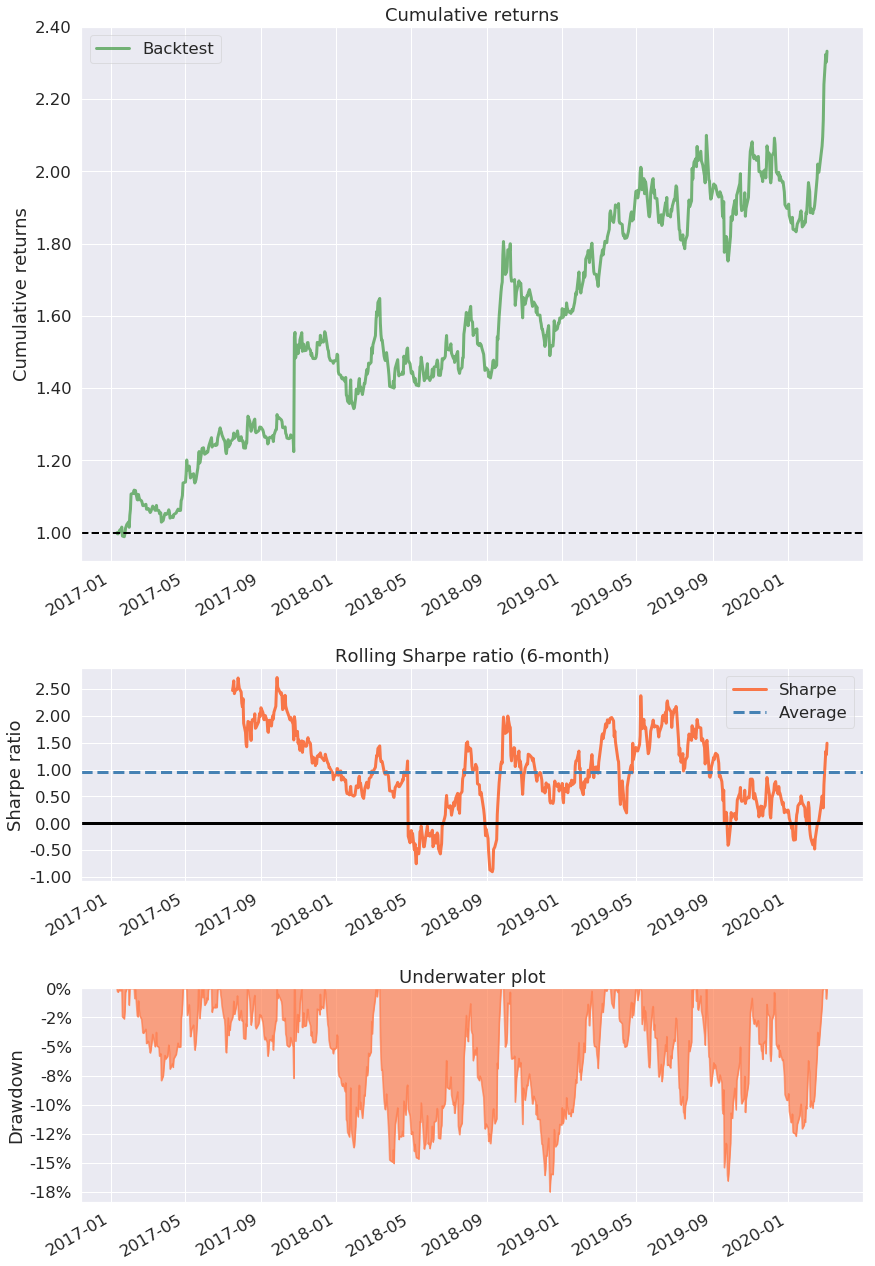

In [5]:
import pyfolio as pf
pf.create_simple_tear_sheet(portfolio.strategy_ret)